### **Time Series using Tensorflow**

In [1]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

2025-03-26 23:37:14.342654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [3]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [4]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [15]:
#  using the dataframe of bit-coin prices
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

# WINDOWING 
HORIZON = 1
WINDOW_SIZE = 7

full_windows,full_labels = tsf.make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

# train-test split without windowing
train_percent = 80
split_size = int(train_percent*0.01*len(timesteps))
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]

# create train and test windows split
train_windows,test_windows,train_labels,test_labels = tsf.make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

**15. Creating a modelling checkpoint callback to save our model**
* Because of our model's performance will fluctuate from experiment to experiment, we are going to write a model checkpoint so that we can compare apples to apples!
* More specifically, we want to compare each of our model's best performances against the other model's best performances.
* For e.g. if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [6]:
# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,savepath='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f'{savepath}/{model_name}.keras',
                                              verbose = 0,
                                              monitor='val_loss',
                                              save_best_only = True
                                              )

**16. Building Dense model (model 1) (horizon = 1, window = 7)**

* single dense layer with 128 hidden units and relu activation
* An output layer with linear activation (no-activation) -- regression problem
* Adam Optimizer & MAE loss function
* Batch size of 128
* 100 epochs

Note: 
* Hyperparameters: values a ML practioner can adjust themselves
* Parameters: values a model learns on its own

In [7]:
# 1. model creation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
], name='model_1_dense')

# 2. model compiling
model_1.compile(loss = 'mae',optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# 3. fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            verbose = 1,
            callbacks=[create_model_checkpoint(model_1.name)]
            )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2223.4282 - mae: 2223.4282 - mse: 13437844.0000 - val_loss: 2262.4775 - val_mae: 2262.4775 - val_mse: 11672267.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 397.1387 - mae: 397.1387 - mse: 493385.8750 - val_loss: 1727.5117 - val_mae: 1727.5117 - val_mse: 6794132.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 202.4564 - mae: 202.4564 - mse: 180997.4375 - val_loss: 1167.2899 - val_mae: 1167.2899 - val_mse: 3534804.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 162.2431 - mae: 162.2431 - mse: 132053.2188 - val_loss: 948.0458 - val_mae: 948.0458 - val_mse: 2601267.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 147.7447 - mae: 147.7447 - mse: 113583.4766 - val_loss: 815.3699 - val_mae: 815.3699 - val_mse: 2203524.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 142.0558 - mae: 142.0558 - mse: 106813.3750 - val_loss: 819.6488 - val_mae: 819.6488 - va

In [8]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

In [9]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 286.8817 - mae: 286.8817 - mse: 344926.6875


[572.4110107421875, 572.4110107421875, 1173971.625]

In [10]:
# load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense.keras')

In [11]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.2317 - mae: 282.2317 - mse: 342426.8438 


[568.0636596679688, 568.0636596679688, 1159592.0]

In [12]:
# making forcasts with the model_1 on test dataset
def make_preds(model,input_data):
    '''
    Uses model to make predictions on input data
    '''

    forcast = model.predict(input_data)
    return tf.squeeze(forcast) # return 1D array of predictions

model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8840.15 , 8787.268, 9058.053, 8747.395, 8750.014, 8771.155,
        8670.703, 8511.431, 8478.553, 8533.695], dtype=float32)>)

In [13]:
model_1_results = tsf.evaluate_time_series(tf.squeeze(test_labels),model_1_preds)
model_1_results

{'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

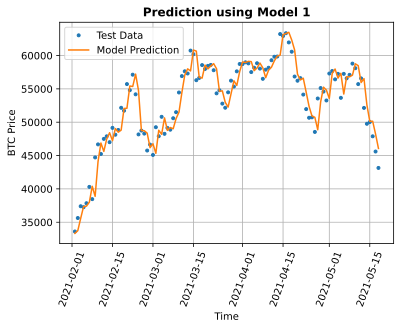

In [32]:
# plotting model_1 predictions
offset = 450
end = None
plt.figure(figsize=(6,4))

# account for test_window offset and index into test_labels to ensure correct plotting
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = tf.squeeze(test_labels),start = offset,end=end,label = "Test Data")
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = model_1_preds,start = offset,end=end,label = "Model Prediction", format='-',xtick_rotation=70,ylabel='BTC Price')
plt.title("Prediction using Model 1",fontsize = 12, fontweight='bold')
plt.show()

***-- CONTD IN NEXT NOTEBOOK --***